In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np

from numpy import genfromtxt
from sklearn.datasets import load_boston

In [2]:
def read_dataset(filePath,delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)

def read_boston_data():
    boston = load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    return features, labels

In [3]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def append_bias_reshape(features,labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    l = np.reshape(labels,[n_training_samples,1])
    return f, l

In [4]:
features,labels = read_boston_data()
normalized_features = feature_normalize(features)
f, l = append_bias_reshape(normalized_features,labels)
n_dim = f.shape[1]

In [5]:
rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

In [6]:
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))

init = tf.initialize_all_variables()


y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


MSE: 535.9484
MSE: 505.6769
MSE: 479.0228
MSE: 455.2730
MSE: 433.8776
MSE: 414.4116
MSE: 396.5454
MSE: 380.0219
MSE: 364.6401
MSE: 350.2414
MSE: 336.7001
MSE: 323.9158
MSE: 311.8074
MSE: 300.3090
MSE: 289.3663
MSE: 278.9340
MSE: 268.9739
MSE: 259.4537
MSE: 250.3450
MSE: 241.6234
MSE: 233.2671
MSE: 225.2566
MSE: 217.5743
MSE: 210.2043
MSE: 203.1317
MSE: 196.3429
MSE: 189.8254
MSE: 183.5671
MSE: 177.5570
MSE: 171.7844
MSE: 166.2395
MSE: 160.9129
MSE: 155.7954
MSE: 150.8787
MSE: 146.1545
MSE: 141.6151
MSE: 137.2530
MSE: 133.0612
MSE: 129.0328
MSE: 125.1614
MSE: 121.4406
MSE: 117.8645
MSE: 114.4274
MSE: 111.1238
MSE: 107.9484
MSE: 104.8961
MSE: 101.9622
MSE: 99.1418
MSE: 96.4306
MSE: 93.8242
MSE: 91.3186
MSE: 88.9098
MSE: 86.5939
MSE: 84.3674
MSE: 82.2267
MSE: 80.1685
MSE: 78.1895
MSE: 76.2866
MSE: 74.4569
MSE: 72.6974
MSE: 71.0055
MSE: 69.3785
MSE: 67.8138
MSE: 66.3090
MSE: 64.8618
MSE: 63.4699
MSE: 62.1312
MSE: 60.8436
MSE: 59.6050
MSE: 58.4137
MSE: 57.2677
MSE: 56.1652
MSE: 55.1046
MSE:

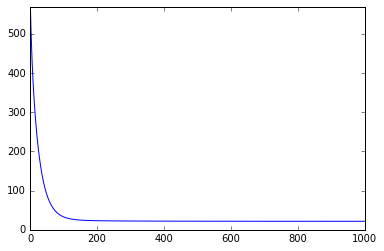

MSE: 23.9705


In [7]:
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))
    pred_y = sess.run(y_, feed_dict={X: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    print("MSE: %.4f" % sess.run(mse))

plt.plot(range(len(cost_history)), cost_history)
plt.axis([0, training_epochs, 0, np.max(cost_history)])
plt.show()

pred_y = sess.run(y_, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

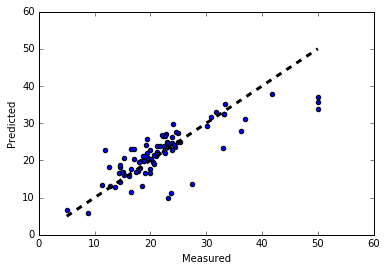

In [8]:
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()